In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter ("ignore", category="ConvergenceWarning")

In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
columns = df.columns
columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
category = [val for val in columns if df[val].dtypes=='object']
category  

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [6]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Duplicates: {df.duplicated().sum()}") 
print(f"missing data: {sum(df.isna().sum())}")

Rows: 918, Columns: 12
Duplicates: 0
missing data: 0


In [7]:
pd.get_dummies(df.Sex, drop_first=False, dummy_na=True).sum()

F      193
M      725
NaN      0
dtype: int64

In [8]:
pd.get_dummies(df.ChestPainType, drop_first=False, dummy_na=True).sum()

ASY    496
ATA    173
NAP    203
TA      46
NaN      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
kolom=len(df.columns)
for i in range (0, kolom):
    df=df[df.iloc[:,i]!='?']
    df=df[df.iloc[:,i]!='']
    df=df[~df.iloc[:,i].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


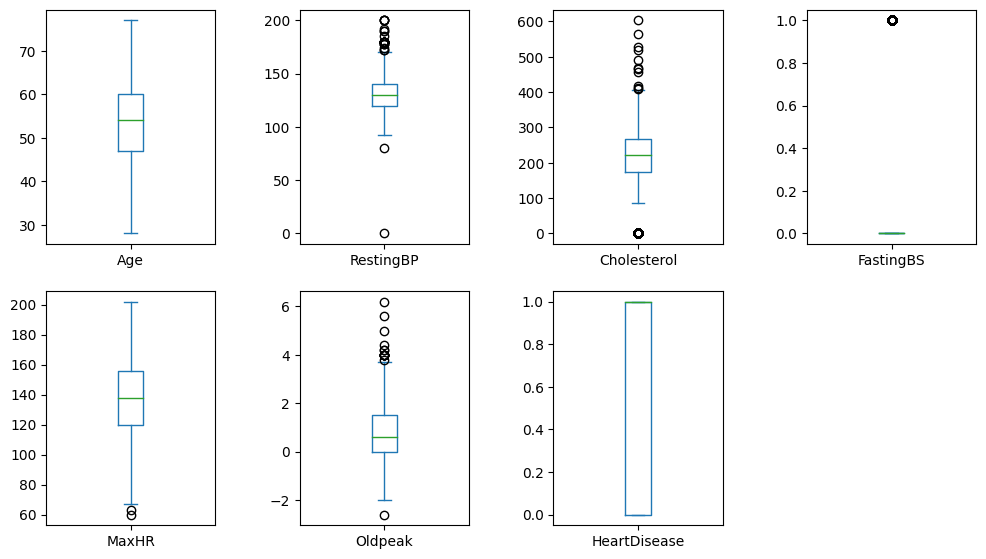

In [11]:
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5); 


Text(0, 0.5, 'Age')

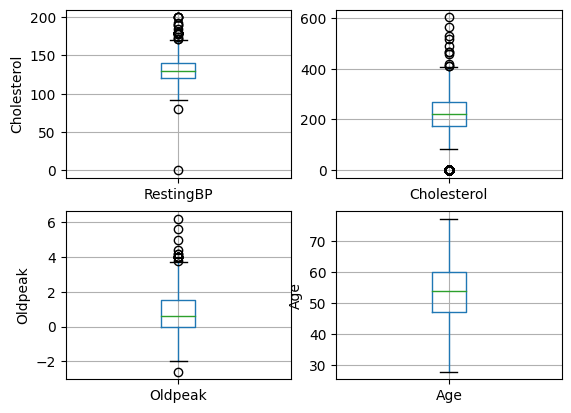

In [12]:
#data tidak normal
plt.subplot(2,2,1)
fig = df.boxplot(column= 'RestingBP')
fig.set_ylabel('RestingBP')

#data tidak normal
plt.subplot(2,2,2)
fifg = df.boxplot(column="Cholesterol")
fig.set_ylabel("Cholesterol")

#data tidak normal
plt.subplot(2,2,3)
fig = df.boxplot(column='Oldpeak')
fig.set_ylabel('Oldpeak')

#data normal
plt.subplot(2,2,4)
fig = df.boxplot(column='Age')
fig.set_ylabel('Age')

In [13]:
#mencari data outlier dengan menggunakan interquartile

# Outliers untuk RestingBP
IQR = df.RestingBP.quantile(0.75) - df.RestingBP.quantile(0.25)
Lower_fence = df.RestingBP.quantile(0.25) - (IQR*3)
Upper_fence = df.RestingBP.quantile(0.75) + (IQR*3)

print(f"RestingBP outliers are values < {Lower_fence} or > {Upper_fence}")

RestingBP outliers are values < 60.0 or > 200.0


In [14]:
# Outliers untuk Cholestrol
IQR = df.Cholesterol.quantile(0.75) - df.Cholesterol.quantile(0.25)
Lower_fence = df.Cholesterol.quantile(0.25) - (IQR*3)
Lower_fence = df.Cholesterol.quantile(0.75) + (IQR*3)
print(f"Cholestrol outliers are values < {Lower_fence} or > {Upper_fence}")

Cholestrol outliers are values < 548.25 or > 200.0


In [15]:
IQR = df.Oldpeak.quantile(0.75) - df.Oldpeak.quantile(0.25) 
Lower_fence = df.Oldpeak.quantile(0.25) - (IQR*3)
Lower_fence = df.Oldpeak.quantile(0.75) + (IQR*3)
print(f"Oldpeak outliers are values < {Lower_fence} or > {Upper_fence}")

Oldpeak outliers are values < 6.0 or > 200.0


In [16]:
#penanganan outlier
def Max_value(df1,variable,top):
    return np.where(df1[variable] > top, top,df1[variable])



df['RestingBP'].head(), df['Cholesterol'].shape, df['Oldpeak'].head()

df['RestingBP'] = Max_value(df,'RestingBP',200)
df['Cholesterol'] = Max_value(df,'Cholesterol',200)
df['Oldpeak'] = Max_value(df,'Oldpeak',200.0)

In [17]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,158.366013,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,77.208855,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,200.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,200.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,200.000000,1.000000,202.000000,6.200000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

DECISION TREE

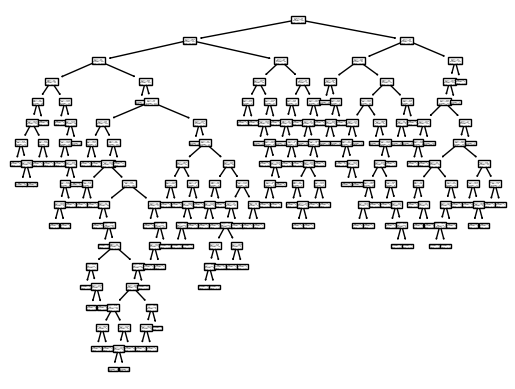

In [22]:
from sklearn.metrics import accuracy_score 
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
tree.plot_tree(clf)
zeroes = 0
ones=0


In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, shuffle=True)

In [24]:
scores1 = cross_val_score(clf, x, y, cv=kf)
print(scores1)
print('rata rata KFold nya adalah: ',scores1.mean())

[0.82608696 0.85869565 0.84782609 0.83695652 0.77173913 0.72826087
 0.80434783 0.85869565 0.78021978 0.85714286]
rata rata KFold nya adalah:  0.816997133301481


In [25]:
prediksi1 = clf.predict(x_test)
prediksi1

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy Score untuk algoritma Decision Tree : ',accuracy_score(prediksi1,y_test)*100,'%')

Accuracy Score untuk algoritma Decision Tree :  75.54347826086956 %


In [61]:
accuracy_Decision_rep = accuracy_score(y_test, prediksi1)
classification_rep_Decision = classification_report(y_test, prediksi1)

print(f'Accuracy: {accuracy_Decision_rep}')
print(f'Classification Report:\n{classification_rep_Decision}')

Accuracy: 0.7554347826086957
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75        89
           1       0.76      0.77      0.76        95

    accuracy                           0.76       184
   macro avg       0.76      0.75      0.76       184
weighted avg       0.76      0.76      0.76       184



LOGISTIC REGRESSION

In [27]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [28]:
scores2 = cross_val_score(classifier, x, y, cv=kf)
print(scores2)
print('rata rata KFold nya adalah: ',scores2.mean())

[0.91304348 0.81521739 0.81521739 0.85869565 0.82608696 0.84782609
 0.82608696 0.86956522 0.84615385 0.91208791]
rata rata KFold nya adalah:  0.852998088867654


In [29]:
y_predlog = classifier.predict(x_test)
y_predlog

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [30]:
accuracylog = accuracy_score(y_test, y_predlog)
print('Akurasi menggunkan algoritma logistic Regression adalah :', (accuracylog)*100,'%')

Akurasi menggunkan algoritma logistic Regression adalah : 83.15217391304348 %


In [60]:
accuracy_LOG_rep = accuracy_score(y_test, y_predlog)
classification_rep_LOG = classification_report(y_test, y_predlog)

print(f'Accuracy: {accuracy_LOG_rep}')
print(f'Classification Report:\n{classification_rep_LOG}')

Accuracy: 0.8315217391304348
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        89
           1       0.81      0.87      0.84        95

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



NAIVE BAYES

In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_prednaive = nb.predict(x_test)
y_prednaive

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [32]:
scores3 = cross_val_score(nb, x, y, cv=kf)
print(scores3)
print('rata rata KFold nya adalah: ',scores3.mean())

[0.82608696 0.85869565 0.76086957 0.84782609 0.86956522 0.83695652
 0.83695652 0.83695652 0.87912088 0.9010989 ]
rata rata KFold nya adalah:  0.8454132823698043


In [33]:
accuracynavie = accuracy_score(y_test, y_prednaive)
print("Akurasi menggunakan algoritma naive bayes :", (accuracynavie)*100,'%')

Akurasi menggunakan algoritma naive bayes : 86.41304347826086 %


In [59]:
accuracy_Naive_rep = accuracy_score(y_test, y_prednaive)
classification_rep_Naive = classification_report(y_test, y_prednaive)

print(f'Accuracy: {accuracy_Naive_rep}')
print(f'Classification Report:\n{classification_rep_Naive}')

Accuracy: 0.8641304347826086
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        89
           1       0.86      0.88      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



KNN 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_predknn = knn.predict(x_test)
y_predknn

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [35]:
scores4 = cross_val_score(knn, x, y, cv=kf)
print(scores4)
print('rata rata KFold nya adalah: ',scores4.mean())

[0.69565217 0.61956522 0.67391304 0.73913043 0.69565217 0.60869565
 0.67391304 0.68478261 0.75824176 0.74725275]
rata rata KFold nya adalah:  0.6896798853320593


In [36]:
accuracyknn = accuracy_score(y_test, y_predknn)
print('akurasi untuk penggunaan algoritma KNN adalah :',(accuracyknn)*100,'%')

akurasi untuk penggunaan algoritma KNN adalah : 64.67391304347827 %


In [58]:
accuracy_KNN_rep = accuracy_score(y_test, y_predknn)
classification_rep_KNN = classification_report(y_test, y_predknn)

print(f'Accuracy: {accuracy_KNN_rep}')
print(f'Classification Report:\n{classification_rep_KNN}')

Accuracy: 0.6467391304347826
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.57      0.61        89
           1       0.64      0.72      0.68        95

    accuracy                           0.65       184
   macro avg       0.65      0.64      0.64       184
weighted avg       0.65      0.65      0.64       184



LINEAR DESCRIMINANT ANALYSIST LDA

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_predLDA = lda.predict(x_test)
accuracyLDA = accuracy_score(y_test, y_predLDA)
y_predLDA

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [38]:
scores5 = cross_val_score(lda, x, y, cv=kf)
print(scores5)
print('rata rata KFold nya adalah: ',scores5.mean())

[0.81521739 0.93478261 0.84782609 0.85869565 0.81521739 0.83695652
 0.89130435 0.79347826 0.89010989 0.86813187]
rata rata KFold nya adalah:  0.8551720019111324


In [39]:
print("Akurasi untuk penggunaan algoritma Linear Discriminant Analysis:", (accuracyLDA)*100,'%')

Akurasi untuk penggunaan algoritma Linear Discriminant Analysis: 86.41304347826086 %


In [57]:
accuracy_LDA_rep = accuracy_score(y_test, y_predLDA)
classification_rep_LDA = classification_report(y_test, y_predLDA)

print(f'Accuracy: {accuracy_LDA_rep}')
print(f'Classification Report:\n{classification_rep_LDA}')

Accuracy: 0.8641304347826086
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        89
           1       0.86      0.87      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



EXTRA TRESS CLASIFIER

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)
y_predETC = model.predict(x_test)
accuracyETC = accuracy_score(y_test, y_predETC)
y_predETC

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [41]:
scores6 = cross_val_score(model, x, y, cv=kf)
print(scores6)
print('rata rata nya adalah: ',scores6.mean())

[0.83695652 0.89130435 0.83695652 0.88043478 0.85869565 0.83695652
 0.83695652 0.89130435 0.89010989 0.86813187]
rata rata nya adalah:  0.8627806975633063


In [42]:
print("Akurasi untuk penggunaan algoritma ExtraTreesClassifier :", (accuracyETC)*100,'%')

Akurasi untuk penggunaan algoritma ExtraTreesClassifier : 85.86956521739131 %


In [56]:
accuracy_ETC_rep = accuracy_score(y_test, y_predETC)
classification_rep_ETC = classification_report(y_test, y_predETC)

print(f'Accuracy: {accuracy_ETC_rep}')
print(f'Classification Report:\n{classification_rep_ETC}')

Accuracy: 0.8586956521739131
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        89
           1       0.83      0.91      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



RANDOM FOREST

In [43]:
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier(n_estimators = 25, random_state=2)
Random_forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=2)

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=7, shuffle=True)

In [45]:
scores7 = cross_val_score(Random_forest, x, y, cv=kf)
print(scores7)
print('rata rata KFold nya adalah: ',scores7.mean())

[0.86363636 0.84732824 0.86259542 0.90839695 0.82442748 0.90076336
 0.83969466]
rata rata KFold nya adalah:  0.863834638643799


In [46]:
forest_pred = Random_forest.predict(x_test)
forest_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
print('Accuracy Score untuk algoritma Random Forest Adalah : ',accuracy_score(forest_pred,y_test)*100,'%')

Accuracy Score untuk algoritma Random Forest Adalah :  84.23913043478261 %


In [48]:
from sklearn.metrics import classification_report, confusion_matrix
accuracy_Random_Forest = accuracy_score(y_test, forest_pred)
classification_rep = classification_report(y_test, forest_pred)

print(f'Accuracy: {accuracy_Random_Forest}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.842391304347826
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        89
           1       0.82      0.88      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



KESIMPULAN DARI KESELURUHAN K FOLD

In [49]:
print('rata rata decision tree adalah: ',scores1.mean())
print('rata rata logistic regression adalah: ',scores2.mean())
print('rata rata naive bayes adalah: ',scores3.mean())
print('rata rata KNN adalah: ',scores4.mean())
print('rata rata Linear Discriminant Analysis adalah: ',scores5.mean())
print('rata rata ExtraTreesClassifier adalah: ',scores6.mean())
print('rata rata RandomForest nya adalah: ',scores7.mean())
print('=='*40)
print('rata rata tertinggi dari RandomForest didapatkan oleh algoritma: ',scores7.mean())

rata rata decision tree adalah:  0.816997133301481
rata rata logistic regression adalah:  0.852998088867654
rata rata naive bayes adalah:  0.8454132823698043
rata rata KNN adalah:  0.6896798853320593
rata rata Linear Discriminant Analysis adalah:  0.8551720019111324
rata rata ExtraTreesClassifier adalah:  0.8627806975633063
rata rata RandomForest nya adalah:  0.863834638643799
rata rata tertinggi dari RandomForest didapatkan oleh algoritma:  0.863834638643799


KESELURUHAN DARI HASIL 6 ALGORITMA

In [50]:
#kesimpulan dari beberapa algoritma pengukuran yang telah dilakukan
print('Accuracy Score untuk algoritma Decision Tree : ',accuracy_score(prediksi1,y_test)*100,'%')
print('Akurasi menggunkan algoritma logistic Regression adalah :', (accuracylog)*100,'%')
print("Akurasi menggunakan algoritma naive bayes :", (accuracynavie)*100,'%')
print('akurasi untuk penggunaan algoritma KNN adalah :',(accuracyknn)*100,'%')
print("Akurasi untuk penggunaan algoritma Linear Discriminant Analysis:", (accuracyLDA)*100,'%')
print("Akurasi untuk penggunaan algoritma ExtraTreesClassifier :", (accuracyETC)*100,'%')
print('Accuracy Score untuk algoritma Random Forest Adalah : ',accuracy_score(forest_pred,y_test)*100,'%')
print('=='*40)
print('rata rata tertinggi dari NaiveBayes dan LDA  didapatkan oleh algoritma: ',(accuracyLDA)*100,'%')

Accuracy Score untuk algoritma Decision Tree :  75.54347826086956 %
Akurasi menggunkan algoritma logistic Regression adalah : 83.15217391304348 %
Akurasi menggunakan algoritma naive bayes : 86.41304347826086 %
akurasi untuk penggunaan algoritma KNN adalah : 64.67391304347827 %
Akurasi untuk penggunaan algoritma Linear Discriminant Analysis: 86.41304347826086 %
Akurasi untuk penggunaan algoritma ExtraTreesClassifier : 85.86956521739131 %
Accuracy Score untuk algoritma Random Forest Adalah :  84.23913043478261 %
rata rata tertinggi dari NaiveBayes dan LDA  didapatkan oleh algoritma:  86.41304347826086 %


Nilai AUC Klasifikasi:  0.8634535777646365
Nilai TPR (True Positive Rate) Klasifikasi:  [0.         0.88421053 1.        ]
Nilai FPR (False Positive Rate) Klasifikasi:  [0.         0.15730337 1.        ]
Akurasi Klasifikasi:  86.41304347826086 %
f-measure score:  0.8638045891931903
Area dibawah Grafik ROC adalah AUC(Area Under Curve)


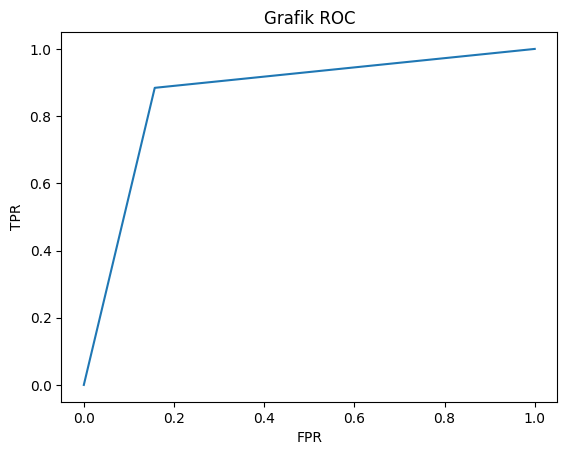

In [51]:
#Analisa Performa dari Klasifikasi
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prednaive, pos_label=1)
print('Nilai AUC Klasifikasi: ', metrics.auc(fpr, tpr))
print('Nilai TPR (True Positive Rate) Klasifikasi: ', tpr)
print('Nilai FPR (False Positive Rate) Klasifikasi: ', fpr)
#Analisa Akurasi dari Klasifikasi
print('Akurasi Klasifikasi: ',metrics.accuracy_score(y_prednaive,y_test)*100,'%')
#Analisa f-measure menggunakan sklearn
from sklearn.metrics import f1_score
f_measure=f1_score(y_test,y_prednaive,average='macro')
print('f-measure score: ',f_measure)
plt.plot(fpr,tpr)
plt.title('Grafik ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('Area dibawah Grafik ROC adalah AUC(Area Under Curve)')

Nilai AUC Klasifikasi:  0.8638083973979894
Nilai TPR (True Positive Rate) Klasifikasi:  [0.         0.87368421 1.        ]
Nilai FPR (False Positive Rate) Klasifikasi:  [0.         0.14606742 1.        ]
Akurasi Klasifikasi:  86.41304347826086 %
f-measure score:  0.8639335048954359
Area dibawah Grafik ROC adalah AUC(Area Under Curve)


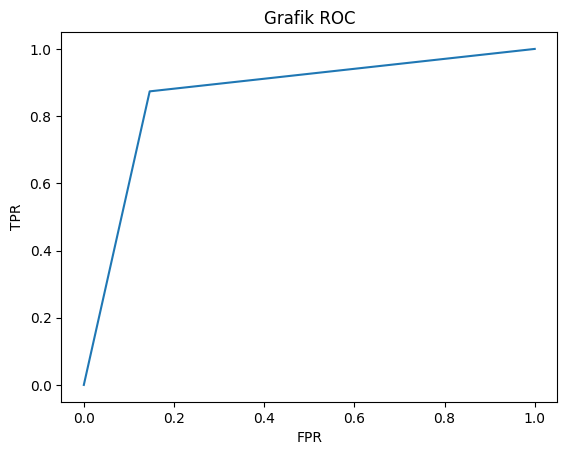

In [52]:
#ALGORITMA LINEAR DESCRIMINANT ANALYSIST
#Analisa Performa dari Klasifikasi
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predLDA, pos_label=1)
print('Nilai AUC Klasifikasi: ', metrics.auc(fpr, tpr))
print('Nilai TPR (True Positive Rate) Klasifikasi: ', tpr)
print('Nilai FPR (False Positive Rate) Klasifikasi: ', fpr)
#Analisa Akurasi dari Klasifikasi
print('Akurasi Klasifikasi: ',metrics.accuracy_score(y_predLDA,y_test)*100,'%')
#Analisa f-measure menggunakan sklearn
from sklearn.metrics import f1_score
f_measure=f1_score(y_test,y_predLDA,average='macro')
print('f-measure score: ',f_measure)
plt.plot(fpr,tpr)
plt.title('Grafik ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('Area dibawah Grafik ROC adalah AUC(Area Under Curve)')

Nilai AUC Klasifikasi:  0.8571259609698404
Nilai TPR (True Positive Rate) Klasifikasi:  [0.         0.90526316 1.        ]
Nilai FPR (False Positive Rate) Klasifikasi:  [0.         0.19101124 1.        ]
Akurasi Klasifikasi:  85.86956521739131 %
f-measure score:  0.8578728461081402
Area dibawah Grafik ROC adalah AUC(Area Under Curve)


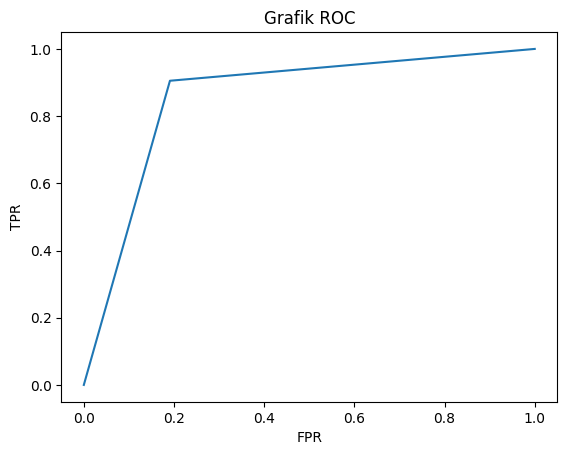

In [53]:
#ALGORITMA EXTRA TRESS CLASIFIER
#Analisa Performa dari Klasifikasi
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predETC, pos_label=1)
print('Nilai AUC Klasifikasi: ', metrics.auc(fpr, tpr))
print('Nilai TPR (True Positive Rate) Klasifikasi: ', tpr)
print('Nilai FPR (False Positive Rate) Klasifikasi: ', fpr)
#Analisa Akurasi dari Klasifikasi
print('Akurasi Klasifikasi: ',metrics.accuracy_score(y_predETC,y_test)*100,'%')
#Analisa f-measure menggunakan sklearn
from sklearn.metrics import f1_score
f_measure=f1_score(y_test,y_predETC,average='macro')
print('f-measure score: ',f_measure)
plt.plot(fpr,tpr)
plt.title('Grafik ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('Area dibawah Grafik ROC adalah AUC(Area Under Curve)')

Nilai AUC Klasifikasi:  0.754997043169722
Nilai TPR (True Positive Rate) Klasifikasi:  [0.         0.76842105 1.        ]
Nilai FPR (False Positive Rate) Klasifikasi:  [0.         0.25842697 1.        ]
Akurasi Klasifikasi:  75.54347826086956 %
f-measure score:  0.7550803088117845
Area dibawah Grafik ROC adalah AUC(Area Under Curve)


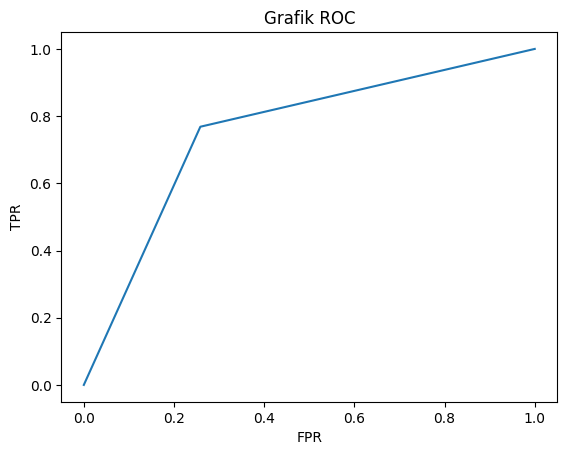

In [54]:
#ALGORITMA KNN
#Analisa Performa dari Klasifikasi
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediksi1, pos_label=1)
print('Nilai AUC Klasifikasi: ', metrics.auc(fpr, tpr))
print('Nilai TPR (True Positive Rate) Klasifikasi: ', tpr)
print('Nilai FPR (False Positive Rate) Klasifikasi: ', fpr)
#Analisa Akurasi dari Klasifikasi
print('Akurasi Klasifikasi: ',metrics.accuracy_score(prediksi1,y_test)*100,'%')
#Analisa f-measure menggunakan sklearn
from sklearn.metrics import f1_score
f_measure=f1_score(y_test,prediksi1,average='macro')
print('f-measure score: ',f_measure)
plt.plot(fpr,tpr)
plt.title('Grafik ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('Area dibawah Grafik ROC adalah AUC(Area Under Curve)')

Nilai AUC Klasifikasi:  0.8409816676522768
Nilai TPR (True Positive Rate) Klasifikasi:  [0.         0.88421053 1.        ]
Nilai FPR (False Positive Rate) Klasifikasi:  [0.         0.20224719 1.        ]
Akurasi Klasifikasi:  84.23913043478261 %
f-measure score:  0.8416006174488675
Area dibawah Grafik ROC adalah AUC(Area Under Curve)


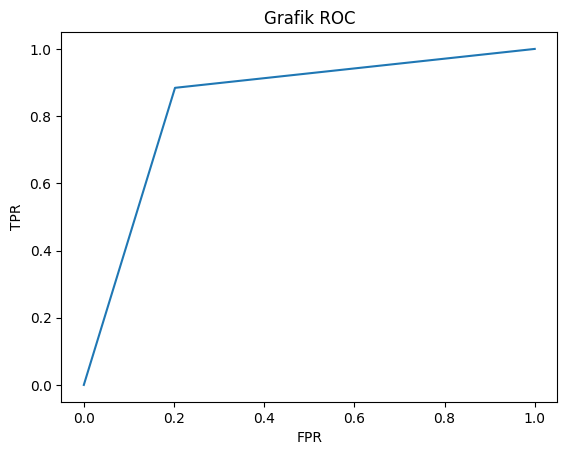

In [55]:
#ALGORITMA RANDOM FOREST 
#Analisa Performa dari Klasifikasi 
fpr, tpr, thresholds = metrics.roc_curve(y_test, forest_pred, pos_label=1)
print('Nilai AUC Klasifikasi: ', metrics.auc(fpr, tpr))
print('Nilai TPR (True Positive Rate) Klasifikasi: ', tpr)
print('Nilai FPR (False Positive Rate) Klasifikasi: ', fpr)
#Analisa Akurasi dari Klasifikasi
print('Akurasi Klasifikasi: ',metrics.accuracy_score(forest_pred,y_test)*100,'%')
#Analisa f-measure menggunakan sklearn
from sklearn.metrics import f1_score
f_measure=f1_score(y_test,forest_pred,average='macro')
print('f-measure score: ',f_measure)
plt.plot(fpr,tpr)
plt.title('Grafik ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('Area dibawah Grafik ROC adalah AUC(Area Under Curve)')